<a href="https://colab.research.google.com/github/aryan-rohit/BullWhip-Effect-prediction-using-ML/blob/main/BullWhip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

# Parameters
num_rows = 1000
holding_cost = 5
backorder_cost = 10

# Set the seed for reproducibility
np.random.seed(42)

# Generate a base demand series
base_demand = np.random.normal(loc=100, scale=20, size=num_rows)

# Generate forecast series by adding some noise to the base demand
forecast_noise = np.random.normal(loc=0, scale=10, size=num_rows)
forecast = base_demand + forecast_noise

# Initialize arrays for calculated values
demand = base_demand
receive = np.zeros(num_rows)
ns = np.zeros(num_rows)
ltd = np.zeros(num_rows)
ss = np.zeros(num_rows)
out = np.zeros(num_rows)
order = np.zeros(num_rows)
cost = np.zeros(num_rows)
bullwhip = np.zeros(num_rows)

# Initial calculations
receive[0] = 100  # Arbitrary initial value for receive
ns[0] = 0
ltd[0] = forecast[0]
ss[0] = 1.645 * np.std(demand[:1])
out[0] = ltd[0] + ss[0]
order[0] = out[0] - ns[0]
cost[0] = holding_cost * ns[0] if ns[0] >= 0 else backorder_cost * -ns[0]

# Populate the dataframe
for i in range(1, num_rows):
    receive[i] = order[i-1]
    ns[i] = ns[i-1] + (receive[i] - demand[i])
    ltd[i] = forecast[i]  # Lead time of 1
    ss[i] = 1.645 * np.std(demand[:i+1])
    out[i] = ltd[i] + ss[i]
    order[i] = out[i] - ns[i]
    cost[i] = holding_cost * ns[i] if ns[i] >= 0 else backorder_cost * -ns[i]

    if i >= 1:
        bullwhip[i] = (np.std(order[:i+1]) / np.mean(order[:i+1])) / (np.std(demand[:i+1]) / np.mean(demand[:i+1]))

# Create DataFrame
df = pd.DataFrame({
    'Demand': demand,
    'Receive': receive,
    'Forecast': forecast,
    'NS': ns,
    'LTD': ltd,
    'SS': ss,
    'OUT': out,
    'Order': order,
    'Cost': cost,
    'Bullwhip': bullwhip
})

# Display the first 10 rows of the dataframe
df.head(10)
import numpy as np
import pandas as pd


# Parameters
num_rows = 1000
holding_cost = 5
backorder_cost = 10

# Set the seed for reproducibility
np.random.seed(42)

# Generate a base demand series
base_demand = np.random.normal(loc=100, scale=20, size=num_rows)

# Generate forecast series by adding some noise to the base demand
forecast_noise = np.random.normal(loc=0, scale=10, size=num_rows)
forecast = base_demand + forecast_noise

# Initialize arrays for calculated values
demand = base_demand
receive = np.zeros(num_rows)
ns = np.zeros(num_rows)
ltd = np.zeros(num_rows)
ss = np.zeros(num_rows)
out = np.zeros(num_rows)
order = np.zeros(num_rows)
cost = np.zeros(num_rows)
bullwhip = np.zeros(num_rows)

# Initial calculations
receive[0] = 100  # Arbitrary initial value for receive
ns[0] = 0
ltd[0] = forecast[0]
ss[0] = 1.645 * np.std(demand[:1])
out[0] = ltd[0] + ss[0]
order[0] = out[0] - ns[0]
cost[0] = holding_cost * ns[0] if ns[0] >= 0 else backorder_cost * -ns[0]

# Populate the dataframe
for i in range(1, num_rows):
    receive[i] = order[i-1]
    ns[i] = ns[i-1] + (receive[i] - demand[i])
    ltd[i] = forecast[i]  # Lead time of 1
    ss[i] = 1.645 * np.std(demand[:i+1])
    out[i] = ltd[i] + ss[i]
    order[i] = out[i] - ns[i]
    cost[i] = holding_cost * ns[i] if ns[i] >= 0 else backorder_cost * -ns[i]

    if i >= 1:
        bullwhip[i] = (np.std(order[:i+1]) / np.mean(order[:i+1])) / (np.std(demand[:i+1]) / np.mean(demand[:i+1]))

# Create DataFrame
df = pd.DataFrame({
    'Demand': demand,
    'Receive': receive,
    'Forecast': forecast,
    'NS': ns,
    'LTD': ltd,
    'SS': ss,
    'OUT': out,
    'Order': order,
    'Cost': cost,
    'Bullwhip': bullwhip
})

# Display the first 10 rows of the dataframe
df.head(10)
#df.to_csv('C:\data.csv')

,Demand,Receive,Forecast,NS,LTD,SS,OUT,Order,Cost,Bullwhip
0,109.934283,100.000000,123.927837,0.000000,123.927837,0.000000,123.927837,123.927837,0.000000,0.000000
1,97.234714,123.927837,106.481051,26.693123,106.481051,10.445396,116.926446,90.233323,133.465617,2.566577
2,112.953771,90.233323,113.550074,3.972676,113.550074,11.203795,124.753869,120.781194,19.863378,2.132504
3,130.460597,120.781194,123.991229,-5.706728,123.991229,19.504105,143.495334,149.202062,57.067280,1.642096
4,95.316933,149.202062,102.299166,48.178402,102.299166,20.840905,123.140071,74.961669,240.892009,2.024045
5,95.317261,74.961669,99.252115,27.822810,99.252115,20.836987,120.089102,92.266292,139.114048,1.947414
6,131.584256,92.266292,140.536189,-11.495155,140.536189,23.969725,164.505914,176.001068,114.951547,2.121287
7,115.348695,176.001068,121.700413,49.157219,121.700413,22.582664,144.283077,95.125858,245.786095,2.235898
8,90.610512,95.125858,101.106039,53.672564,101.106039,23.761877,124.867917,71.195352,268.362821,2.257152
9,110.851201,71.195352,105.498849,14.016716,105.498849,22.566305,128.065154,114.048438,70.083579,2.253065


In [4]:
df = pd.read_csv('data.csv')

print(df)

     Unnamed: 0      Demand     Receive    Forecast         NS         LTD  \
0             0  109.934283  100.000000  123.927837   0.000000  123.927837   
1             1   97.234714  123.927837  106.481051  26.693123  106.481051   
2             2  112.953771   90.233323  113.550074   3.972676  113.550074   
3             3  130.460597  120.781194  123.991229  -5.706728  123.991229   
4             4   95.316933  149.202062  102.299166  48.178402  102.299166   
..          ...         ...         ...         ...        ...         ...   
995         995   94.377994   70.007693  105.079497  21.312479  105.079497   
996         996  135.953731  115.960737  135.688518   1.319486  135.688518   
997         997  112.816857  166.599999  103.998111  55.102627  103.998111   
998         998   88.576420   81.116806   86.945751  47.643013   86.945751   
999         999  111.451656   71.513789  104.002629   7.705147  104.002629   

            SS         OUT       Order        Cost  Bullwhip  


In [5]:
df.head(10)

,Unnamed: 0,Demand,Receive,Forecast,NS,LTD,SS,OUT,Order,Cost,Bullwhip
0,0,109.934283,100.000000,123.927837,0.000000,123.927837,0.000000,123.927837,123.927837,0.000000,0.000000
1,1,97.234714,123.927837,106.481051,26.693123,106.481051,10.445396,116.926446,90.233323,133.465617,2.566577
2,2,112.953771,90.233323,113.550074,3.972676,113.550074,11.203795,124.753869,120.781194,19.863378,2.132504
3,3,130.460597,120.781194,123.991229,-5.706728,123.991229,19.504105,143.495334,149.202062,57.067280,1.642096
4,4,95.316933,149.202062,102.299166,48.178402,102.299166,20.840905,123.140071,74.961669,240.892009,2.024045
5,5,95.317261,74.961669,99.252115,27.822810,99.252115,20.836987,120.089102,92.266292,139.114048,1.947414
6,6,131.584256,92.266292,140.536189,-11.495155,140.536189,23.969725,164.505914,176.001068,114.951547,2.121287
7,7,115.348695,176.001068,121.700413,49.157219,121.700413,22.582664,144.283077,95.125858,245.786095,2.235898
8,8,90.610512,95.125858,101.106039,53.672564,101.106039,23.761877,124.867917,71.195352,268.362821,2.257152
9,9,110.851201,71.195352,105.498849,14.016716,105.498849,22.566305,128.065154,114.048438,70.083579,2.253065


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [7]:
y = df['Bullwhip']

In [8]:
X = df.drop('Bullwhip', axis =1)

In [9]:
X

,Unnamed: 0,Demand,Receive,Forecast,NS,LTD,SS,OUT,Order,Cost
0,0,109.934283,100.000000,123.927837,0.000000,123.927837,0.000000,123.927837,123.927837,0.000000
1,1,97.234714,123.927837,106.481051,26.693123,106.481051,10.445396,116.926446,90.233323,133.465617
2,2,112.953771,90.233323,113.550074,3.972676,113.550074,11.203795,124.753869,120.781194,19.863378
3,3,130.460597,120.781194,123.991229,-5.706728,123.991229,19.504105,143.495334,149.202062,57.067280
4,4,95.316933,149.202062,102.299166,48.178402,102.299166,20.840905,123.140071,74.961669,240.892009
...,...,...,...,...,...,...,...,...,...,...
995,995,94.377994,70.007693,105.079497,21.312479,105.079497,32.193720,137.273216,115.960737,106.562397
996,996,135.953731,115.960737,135.688518,1.319486,135.688518,32.230967,167.919485,166.599999,6.597428
997,997,112.816857,166.599999,103.998111,55.102627,103.998111,32.221322,136.219433,81.116806,275.513137
998,998,88.576420,81.116806,86.945751,47.643013,86.945751,32.211052,119.156802,71.513789,238.215064


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = XGBRegressor()

# Train the model
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = model.predict(X_test_scaled)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

In [15]:
mean_er =  mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
mae = mean_absolute_error(y_test, y_pred)

In [17]:
print(mean_er, r2, mae)

9.26825499712444e-05 0.9831641633223367 0.004831535978783734


In [18]:
import matplotlib.pyplot as plt




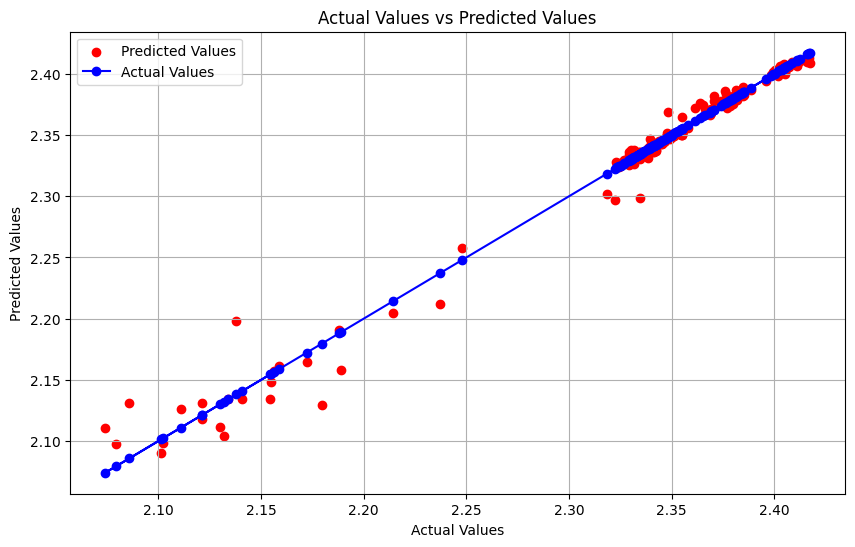

In [19]:
actual_values = y_test
predicted_values = y_pred
plt.figure(figsize=(10, 6))

# Plot the predicted values against the actual values
plt.scatter(actual_values, predicted_values, color='red', label='Predicted Values')

# Plot the 45-degree line (actual values vs actual values)
plt.plot(actual_values, actual_values, label='Actual Values', marker='o', linestyle='-', color='blue')



# Add titles and labels
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfg = RandomForestRegressor()

In [22]:
from sklearn.metrics import r2_score

In [23]:
rfg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [24]:
y_pred = rfg.predict(X_test_scaled)

In [25]:
mean_er =  mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
mae = mean_absolute_error(y_test, y_pred)

In [27]:
print(mean_er, r2, mae)

0.0008679330884145924 0.8423394724441486 0.006282895962217262


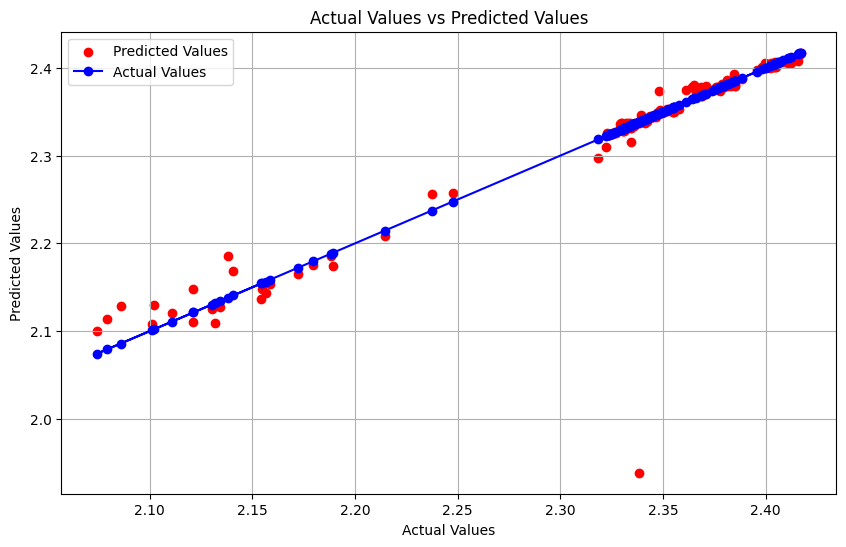

In [28]:
actual_values = y_test
predicted_values = y_pred
plt.figure(figsize=(10, 6))

# Plot the predicted values against the actual values
plt.scatter(actual_values, predicted_values, color='red', label='Predicted Values')

# Plot the 45-degree line (actual values vs actual values)
plt.plot(actual_values, actual_values, label='Actual Values', marker='o', linestyle='-', color='blue')



# Add titles and labels
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [30]:
y_pred = knn_model.predict(X_test_scaled)

In [31]:
mean_er =  mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [32]:
print(mean_er, r2, mae)

0.002420691655278982 0.5602800163795265 0.02751889365002037


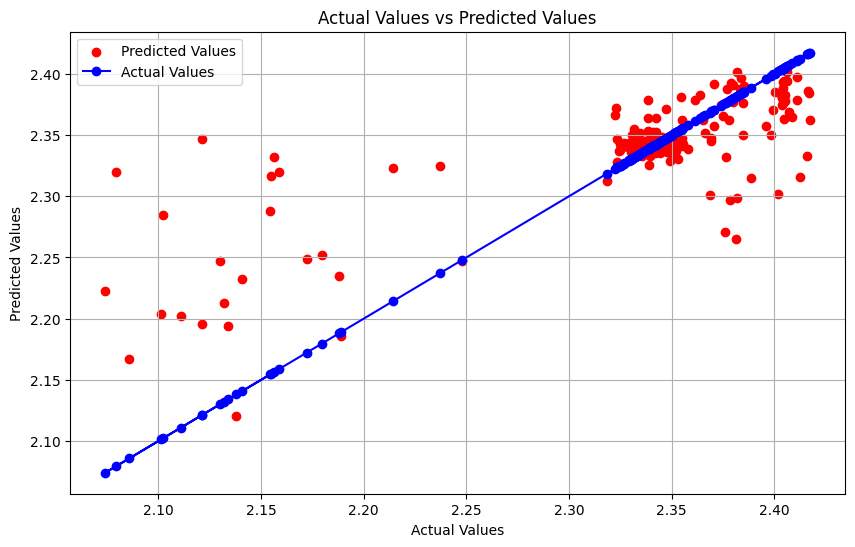

In [33]:
actual_values = y_test
predicted_values = y_pred
plt.figure(figsize=(10, 6))

# Plot the predicted values against the actual values
plt.scatter(actual_values, predicted_values, color='red', label='Predicted Values')

# Plot the 45-degree line (actual values vs actual values)
plt.plot(actual_values, actual_values, label='Actual Values', marker='o', linestyle='-', color='blue')



# Add titles and labels
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

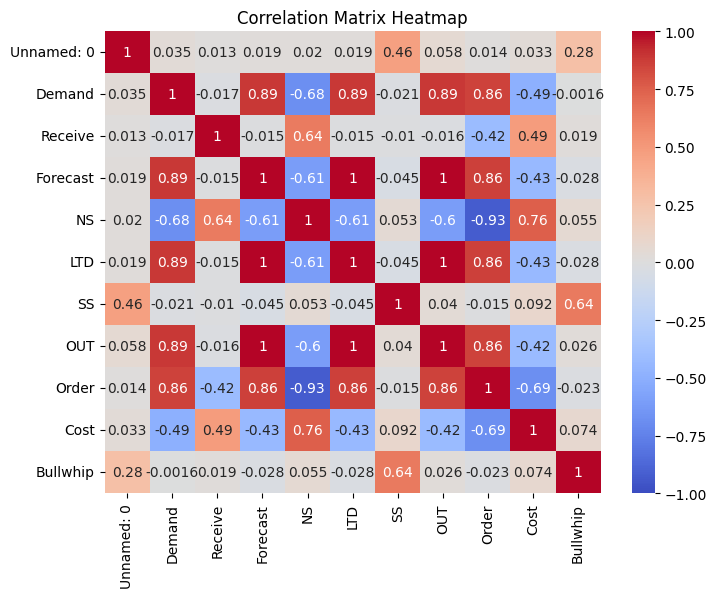

In [35]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [36]:
df.corr()

,Unnamed: 0,Demand,Receive,Forecast,NS,LTD,SS,OUT,Order,Cost,Bullwhip
Unnamed: 0,1.000000,0.035484,0.013346,0.019319,0.020342,0.019319,0.461614,0.058456,0.014388,0.032515,0.277153
Demand,0.035484,1.000000,-0.016787,0.887366,-0.682696,0.887366,-0.021311,0.885752,0.855439,-0.493041,-0.001587
Receive,0.013346,-0.016787,1.000000,-0.015398,0.638487,-0.015398,-0.010109,-0.016258,-0.418361,0.488981,0.018559
Forecast,0.019319,0.887366,-0.015398,1.000000,-0.608540,1.000000,-0.044940,0.996407,0.859741,-0.430347,-0.028322
NS,0.020342,-0.682696,0.638487,-0.608540,1.000000,-0.608540,0.052682,-0.604206,-0.927232,0.756825,0.055066
LTD,0.019319,0.887366,-0.015398,1.000000,-0.608540,1.000000,-0.044940,0.996407,0.859741,-0.430347,-0.028322
SS,0.461614,-0.021311,-0.010109,-0.044940,0.052682,-0.044940,1.000000,0.039826,-0.015172,0.092108,0.644775
OUT,0.058456,0.885752,-0.016258,0.996407,-0.604206,0.996407,0.039826,1.000000,0.858641,-0.422632,0.026333
Order,0.014388,0.855439,-0.418361,0.859741,-0.927232,0.859741,-0.015172,0.858641,1.000000,-0.685469,-0.023047
Cost,0.032515,-0.493041,0.488981,-0.430347,0.756825,-0.430347,0.092108,-0.422632,-0.685469,1.000000,0.073836


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lg = LinearRegression()

In [39]:
lg.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = lg.predict(X_test)

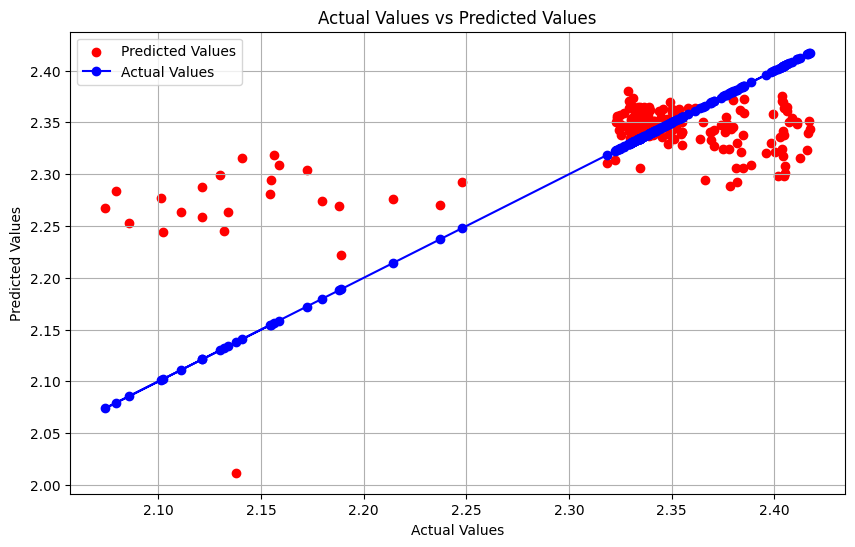

In [41]:
actual_values = y_test
predicted_values = y_pred
plt.figure(figsize=(10, 6))

# Plot the predicted values against the actual values
plt.scatter(actual_values, predicted_values, color='red', label='Predicted Values')

# Plot the 45-degree line (actual values vs actual values)
plt.plot(actual_values, actual_values, label='Actual Values', marker='o', linestyle='-', color='blue')



# Add titles and labels
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()